# Single Mode

> finding the single mode condition

In [ ]:
#| default_exp singlemode

The question is concerned with the single mode cutoff of a silicon nitride waveguide:
> What’s the maximum waveguide width for a silicon nitride at 1550nm TE polarization for 400nm thick to be single mode?

To answer that question lets sweep the effective index of the first couple of modes at different waveguide widths:


In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| hide
from skill_challenge.util import np, gf, gt, plt, nm

In [ ]:
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1.0,
    slab_thickness=0.0,
    core_material="sin",
    clad_material="sio2",
    core_thickness=400 * nm,
    num_modes=4,
)

light_line = 1.44
w = np.linspace(200 * nm, 1100 * nm, 10)

n_eff = gt.modes.sweep_n_eff(strip, core_width=w)
te_pol = gt.modes._sweep(strip, "TE_pol_fraction", core_width=w)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

And also plot the results:

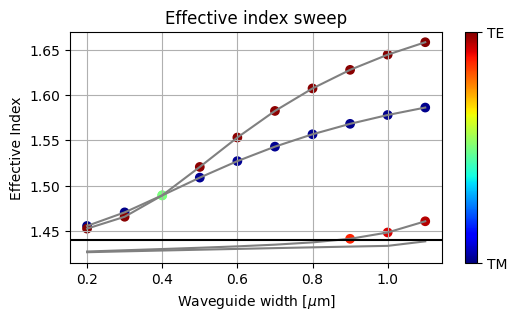

In [ ]:
plt.figure(figsize=(6,3))

for i in range(4):
    y = np.array(n_eff.sel(mode_index=i).real)
    plt.plot(w, y, color="gray")
    y[y<light_line] = np.nan #do not consider polarization below the light line
    plt.scatter(w, y, c = te_pol.sel(mode_index=i), cmap="jet", vmin=0, vmax=1, label=f"{i}")
    
cbar = plt.colorbar(ticks=[0, 1])
cbar.ax.set_yticklabels(['TM', 'TE'])

plt.grid()
plt.xlabel("Waveguide width [$\mu$m]")
plt.ylabel("Effective Index")
plt.axhline(y=light_line, color="k")
plt.title("Effective index sweep")

## Interpretation
Two modes are guided for small widths (quasi TE and TM), and a third mode crosses the light line (refractive index of the background material) at a width of ca. 0.9um. This is the point below which the given silicon nitride waveguide becomes single mode in the conventional sense. It only supports a single mode of the qTE polarization of interest.
A stricter definition of single mode exists in literature:
> A single-polarization single-mode (SPSM) waveguide is a waveguide that is truly single-mode in the sense of supporting only a single guided-mode solution (rather than two or more, commonly corresponding to two polarizations as in standard “single-mode” fibers)
- Lee et. al "Design strategies and rigorous conditions for single-polarization single-mode waveguides"

This condition cannot be met using rectangular silicon nitride waveguides (see mentioned paper). Therefore I assume the question targeted the single mode regime in the conventional sense.

## Notes
Also note that the qTE and qTM modes cross (having a degeneracy in w=400nm). This degeneracy exists, as I am using a drastically simplified model of a perfectly rectangular waveguide (no sidewall angle) without BOX etc. To get more accurate results the simulated material properties should also be calibrated to the intended foundary process. This statement is valid for all questions and will not be repeated going forward.

To color the modes according to their polarization I have monkey patched a property to determine the TE polarization fraction (Lumericals formula). I will create a PR later.

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()